## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

In [4]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [5]:
df = pd.read_csv("https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1")
df.head()

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease
2,Miles Wolf,62,0,3,130,263,1,97,No Disease
3,Mikaila Block,43,1,1,115,303,1,181,Disease
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease


## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [ ]:
#convert 'diagnosis' to 0 or 1
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == "Disease" else 0)

X = df[['age', 'chol']]
y = df['diagnosis']

model = LogisticRegression()
model.fit(X, y)

#extract coefficients
intercept = model.intercept_[0]
coefficients = model.coef_[0]

print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")

log_odds = 0  # Decision boundary
age = 55

#solving
chol = (log_odds - intercept - coefficients[0] * age) / coefficients[1]

print(f"Required cholesterol level for a 55-year-old to predict heart disease: {chol:.2f}")

Intercept: 3.240112258858985
Coefficients: [-0.04686331 -0.00180124]
Required cholesterol level for a 55-year-old to predict heart disease: 367.87


In [ ]:
age = 55
probability = 0.9

#calculating log-odds for 90% probability
log_odds = np.log(probability / (1 - probability))

#solving
chol = -(log_odds - intercept - coefficients[0] * age) / coefficients[1]

print(f"Required cholesterol level for a 90% chance of heart disease: {chol:.2f}")

Required cholesterol level for a 90% chance of heart disease: 851.97


## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = df[['age', 'chol']]
y = df['diagnosis']
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

#coefficients of the linear decision boundary
coef = lda.coef_[0]  #coefficients for age and chol
intercept = lda.intercept_[0]  #intercept

#solving
age = 55
chol_threshold = -(intercept + coef[0] * age) / coef[1]

print(f"The cholesterol level needed for a doctor to predict heart disease for a 55-year-old is: {chol_threshold}")


The cholesterol level needed for a doctor to predict heart disease for a 55-year-old is: 368.235357529938


## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define the SVC model with linear kernel (used ChatGPT here)
svc = SVC(kernel='linear')

#tuning
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(X, y)

#best SVC model
best_svc = grid_search.best_estimator_

coef = best_svc.coef_[0]
intercept = best_svc.intercept_[0]

#solving for chol at age = 55
age = 55
chol_threshold = -(intercept + coef[0] * age) / coef[1]

print(f"The cholesterol level needed for a doctor to predict heart disease for a 55-year-old is: {chol_threshold}")


The cholesterol level needed for a doctor to predict heart disease for a 55-year-old is: 312.69049430633044


## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

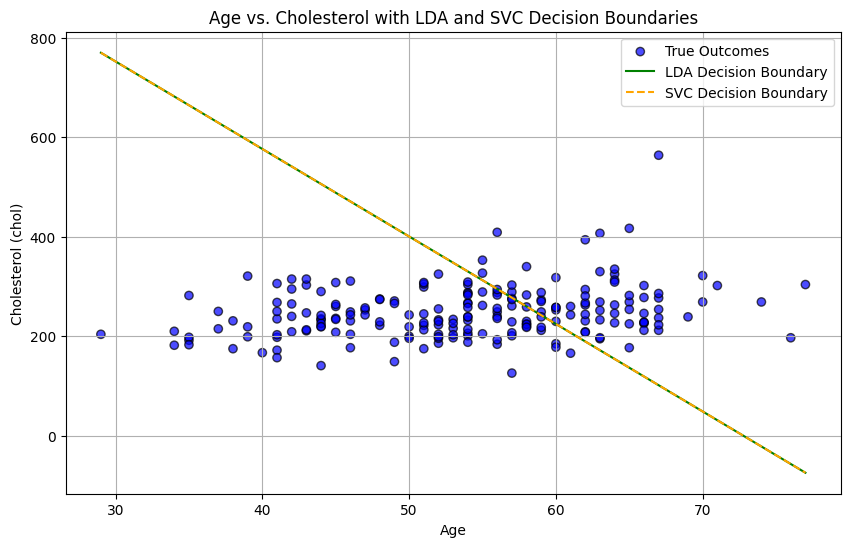

In [12]:
import matplotlib.pyplot as plt

#scatterplot
plt.figure(figsize=(10, 6))
colors = ['red' if outcome == 1 else 'blue' for outcome in y]
plt.scatter(X['age'], X['chol'], c=colors, alpha=0.7, edgecolor='k', label='True Outcomes')

#decision boundary for LDA
lda_slope = -coef[0] / coef[1]  # slope of LDA decision boundary
lda_intercept = -intercept / coef[1]  # intercept of LDA decision boundary
x_vals = np.linspace(X['age'].min(), X['age'].max(), 100)
lda_line = lda_slope * x_vals + lda_intercept
plt.plot(x_vals, lda_line, label='LDA Decision Boundary', linestyle='-', color='green')

#decision boundary for SVC
svc_coef = best_svc.coef_[0]
svc_intercept = best_svc.intercept_[0]
svc_slope = -svc_coef[0] / svc_coef[1]  # slope of SVM decision boundary
svc_intercept = -svc_intercept / svc_coef[1]  # intercept of SVM decision boundary
svc_line = svc_slope * x_vals + svc_intercept
plt.plot(x_vals, svc_line, label='SVC Decision Boundary', linestyle='--', color='orange')

#additions
plt.xlabel('Age')
plt.ylabel('Cholesterol (chol)')
plt.title('Age vs. Cholesterol with LDA and SVC Decision Boundaries')
plt.legend()
plt.grid(True)
plt.show()